# Errors v/s Exceptions:

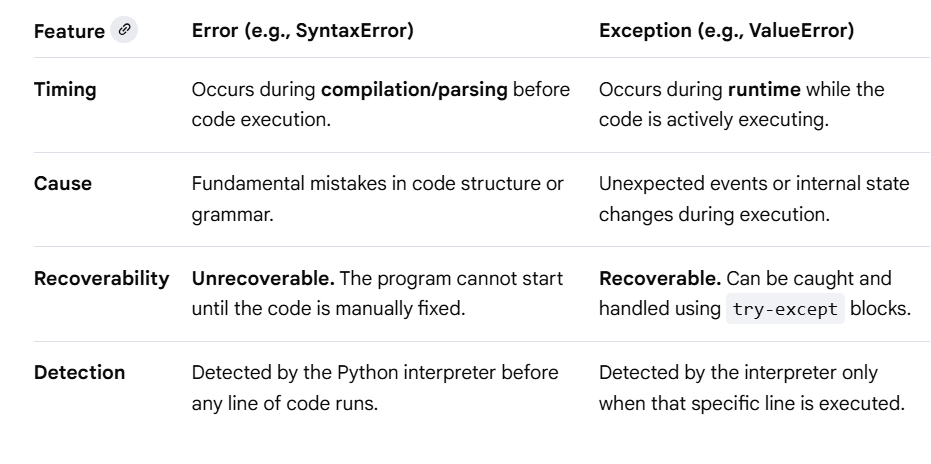

# Types of exceptions:

# Compile-Time Errors 
## These are syntactical errors found in the code, due to which a program fails to compile. 
## For example, forgetting a colon in the statements like if, while, for, def, etc. will result in compile-time error. Such errors are detected by Python compiler and the line number along with error description is displayed by the Python compiler. 

# Runtime Errors 
## When PVM cannot execute the byte code, it flags runtime error. 
## For example, insufficient memory to store something or inability of the PVM to execute some statement come under runtime errors. 
## Runtime errors are not detected by the Python compiler. They are detected by the PVM, only at runtime.

# Logical Errors 
## These errors depict flaws in the logic of the program. The programmer might be using the wrong formula, or the design of the program itself is wrong. Logical errors are not detected either by the Python compiler or PVM. The programmer is solely responsible for them.  
## for example, the programmer wants to calculate the incremented salary of an employee, but he gets wrong output, since he uses wrong formula. 

# Exceptions:
##  An exception is a runtime error which can be handled by the programmer. That means if the programmer can guess an error in the program and he can do something to eliminate the harm caused by that error, then it is called an ‘exception’. . 

# Types of Exceptions:
# 1) Built-In Exceptions
## The exceptions which are already available in Python are called ‘built-in’ exceptions. 

# Types of Built-in Exception:
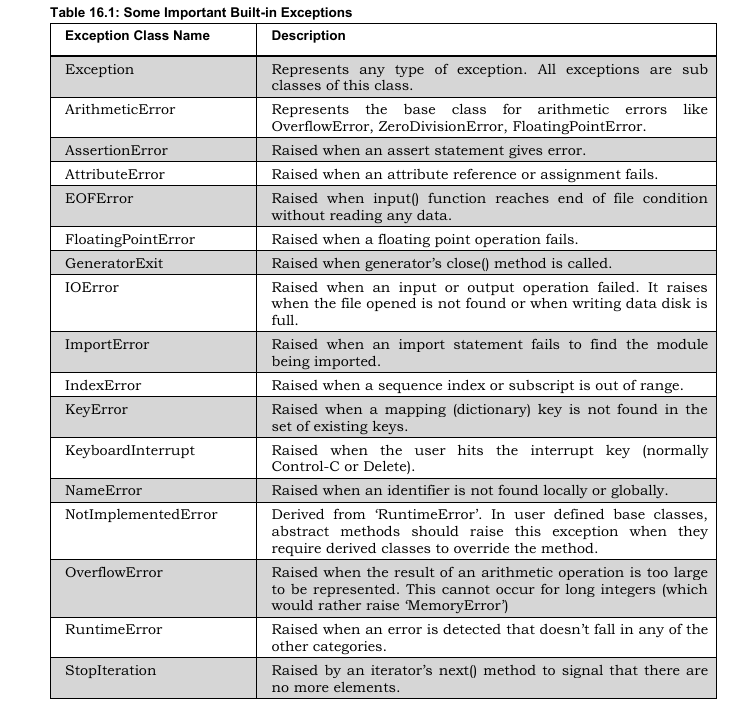
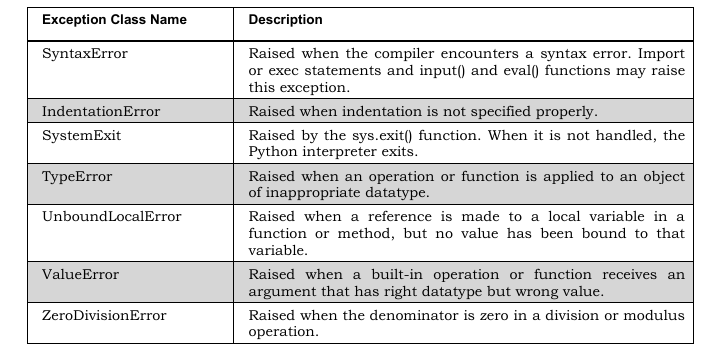

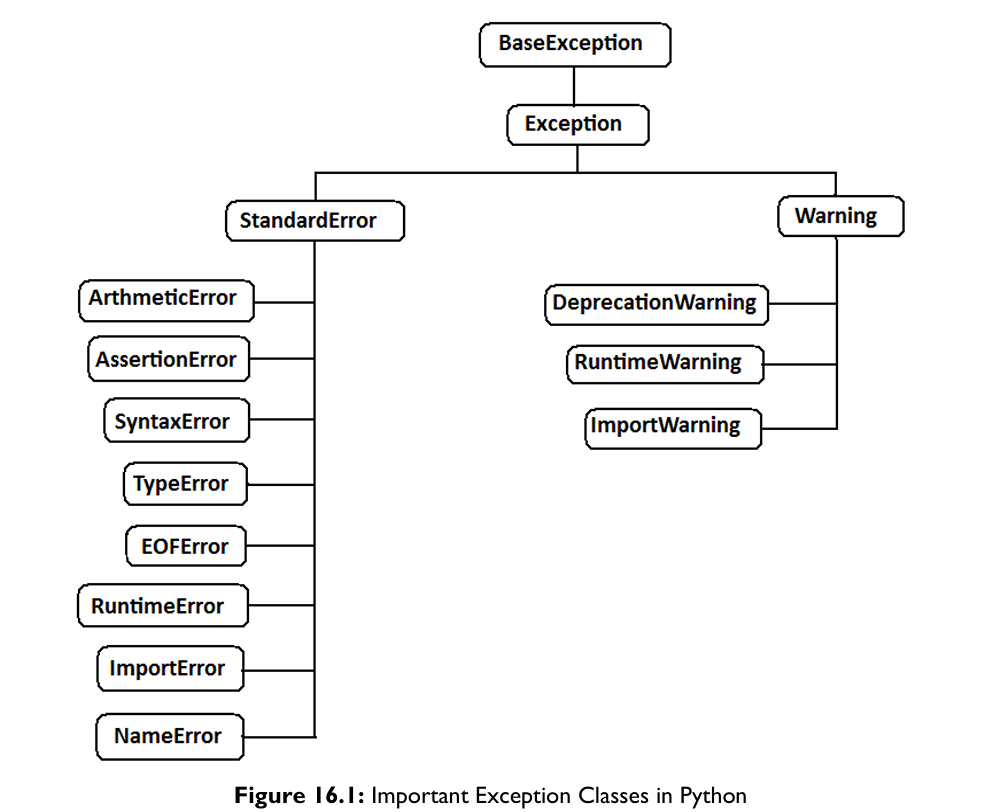

# Exception Handling:
## The purpose of handling errors is to make the program robust. The word ‘robust’ means ‘strong’.

## when there is an error in the program, it will display an appropriate message to the user and continue execution. Designing such programs is needed in any software development.


## __Step 1:__ The programmer should observe the statements in his program where there may be a possibility of exceptions.When PVM understands that there is an exception, it jumps into an ‘except’ block. 
## __Step 2:__ The programmer should write the ‘except’ block where he should display the exception details to the user. This helps the user to understand that there is some error in the program. The programmer should also display a message regarding what can be done to avoid this error.
## __Step 3:__ Lastly, the programmer should perform clean up actions like closing the files and terminating any other processes which are running. The programmer should write this code in the finally block. 

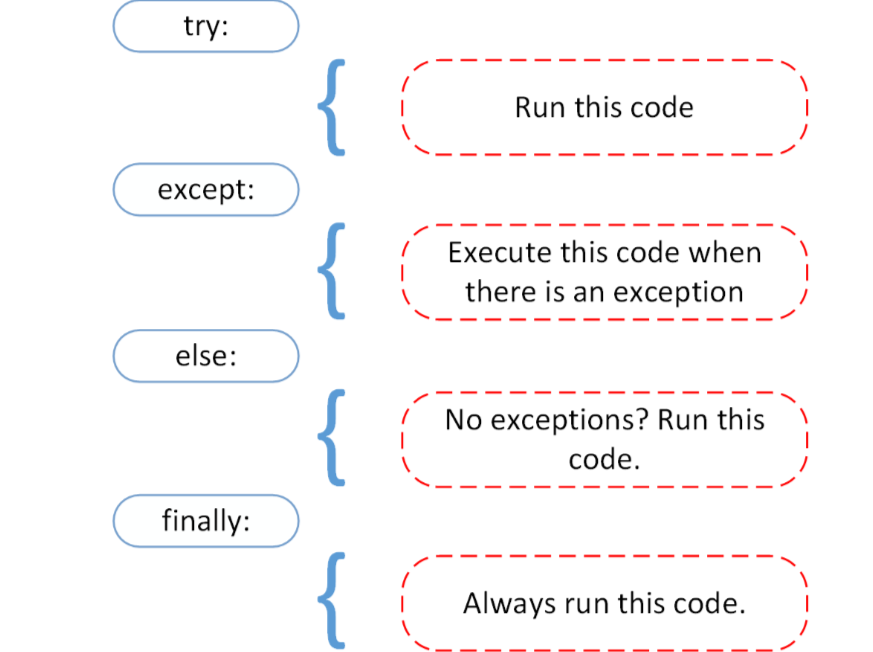

### `Note: in exception handling, the programmer is not preventing the exception, as in many cases it is not possible. But the programmer is avoiding any damage that may happen to data and software.`

##  A single try block can be followed by several except blocks. 
##  Multiple except blocks can be used to handle multiple exceptions.  
##  We cannot write except blocks without a try block. 
##  We can write a try block without any except blocks. 
##  Else block and finally blocks are not compulsory. 

In [4]:
def divide(a, b):
   try:
       result = a / b
       print("Result:", result)
   except ZeroDivisionError:
       print("Error: Division by zero")
divide(10, 2) # Output: Result: 5.0
divide(10, 0) # Output: Error: Division by zero

Result: 5.0
Error: Division by zero


In [17]:
try: 
    date = eval(input("Enter date: ")) 
except SyntaxError: 
    print('Invalid date entered') 
else: 
    print('You entered: ', date) 


Enter date:  01,10,2005


Invalid date entered


In [14]:
def date_of_birth(date):
    try: 
        date = eval(input("Enter date: ")) 
    except SyntaxError: 
        print('Invalid date entered') 
    else: 
        print('You entered: ', date) 
date_of_birth(date)

Enter date:  1,55,4587


You entered:  (1, 55, 4587)


In [18]:
try: 
    name = input('Enter filename: ') 
    f = open(name, 'r') 
except IOError: 
    print('File not found: ', name) 
else: 
    n = len(f.readlines()) 
    print(name, 'has', n, 'lines') 
    f.close()

Enter filename:  big_data.txt


File not found:  big_data.txt


In [26]:
try:
   with open("data.txt") as f:
       content = f.read()
except OSError as e: # Catches FileNotFoundError, PermissionError, etc FileNotFoundError inherit from OSError.
   print(f"File error: {e}")

File error: [Errno 2] No such file or directory: 'data.txt'


In [27]:
try:
   f = open("data.txt", "r")
   data = f.read()
except FileNotFoundError:
   print("File missing.")
finally:
   if 'f' in locals() and not f.closed:
       f.close()
       print("File closed.")

File missing.


In [28]:
try:
   num = int(input("Enter a number: "))
   result = 10 / num
except (ValueError, ZeroDivisionError) as e:
   print(f"Error occurred: {e}")

Enter a number:  0


Error occurred: division by zero


In [23]:
# handling AssertionError 
try: 
    x = int(input('Enter a number between 5 and 10: ')) 
    assert x>=5 and x<=10  
    print('The number entered: ', x) 
except AssertionError: 
    print('The condition is not fulfilled') 

Enter a number between 5 and 10:  12


The condition is not fulfilled


In [24]:
try: 
    x = int(input('Enter a number between 5 and 10: ')) 
    assert x>=5 and x<=10, "Your input is not correct"  
    print('The number entered: ', x) 
except AssertionError as obj: 
    print(obj) 

Enter a number between 5 and 10:  6


The number entered:  6


In [29]:
from contextlib import suppress
with suppress(FileNotFoundError, PermissionError):
   with open("data.txt") as f:
       print(f.read())

In [30]:
try:
   raise ExceptionGroup("Multiple errors", [ValueError("bad"), KeyError("missing")])
except* (ValueError, KeyError) as eg:
   for err in eg.exceptions:
       print(f"Caught: {err}")

Caught: bad
Caught: 'missing'


# Custom/User Defined Exceptions:
## In Python, user-defined exceptions allow developers to create custom error types that can be raised and handled in a program. This is particularly useful when you need to enforce specific constraints or handle unique error conditions that are not covered by built-in exceptions.

# The ‘raise’ statement is useful to raise user-defined exceptions. 

In [31]:
class CustomError(Exception):
   pass
# Raising the custom exception
raise CustomError("This is a custom exception")

CustomError: This is a custom exception

In [38]:
class MyError(Exception):
    def __init__(self,msg):
        self.msg=msg
def check(dict):
    for k,v in dict.items():
        print(f"Name:{k} Balance:{v} ")
        if v<2000:
            raise MyError(f"Balance is less than the minimum balance in {k} account")
            
bank = {'Raj':5000.00, 'Vani':8900.50, 'Ajay':1990.00, 'Naresh':3000.00, 'Manoj':1000000} 

try:
    check(bank)
except MyError as me:
    print(MyError)

Name:Raj Balance:5000.0 
Name:Vani Balance:8900.5 
Name:Ajay Balance:1990.0 
<class '__main__.MyError'>


In [40]:
class InvalidAgeException(Exception):
   """Raised when the input value is less than 18"""
   pass
try:
   input_num = int(input("Enter a number: "))
   if input_num < 18:
       raise InvalidAgeException
   else:
       print("Eligible to Vote")
except InvalidAgeException:
   print("Exception occurred: Invalid Age")

Enter a number:  17


Exception occurred: Invalid Age


In [42]:
class SalaryNotInRangeError(Exception):
   """Exception raised for errors in the input salary
    Attributes:
       salary -- input salary which caused the error
       message -- explanation of the error
   """
   def __init__(self, salary, message="Salary is not in (5000, 15000) range"):
       self.salary = salary
       self.message = message
       super().__init__(self.message)
try:
   salary = int(input("Enter salary amount: "))
   if not 5000 < salary < 15000:
       raise SalaryNotInRangeError(salary)
except SalaryNotInRangeError as e:
   print(e)

Enter salary amount:  1000


Salary is not in (5000, 15000) range


# Logging the Exceptions:
## It is a good idea to store all the error messages raised by a program into a file. The file which stores the messages, especially of errors or exceptions is called a ‘log’ file and this technique is called ‘logging’. 

# Note:  ` logging helps in debugging the programs. Python provides a module (logging) that is useful to create a log file that can store all error messages that may occur while executing a program  `

#  Depending on the seriousness of the error, they are classified into 6 levels in the ‘logging’ module,
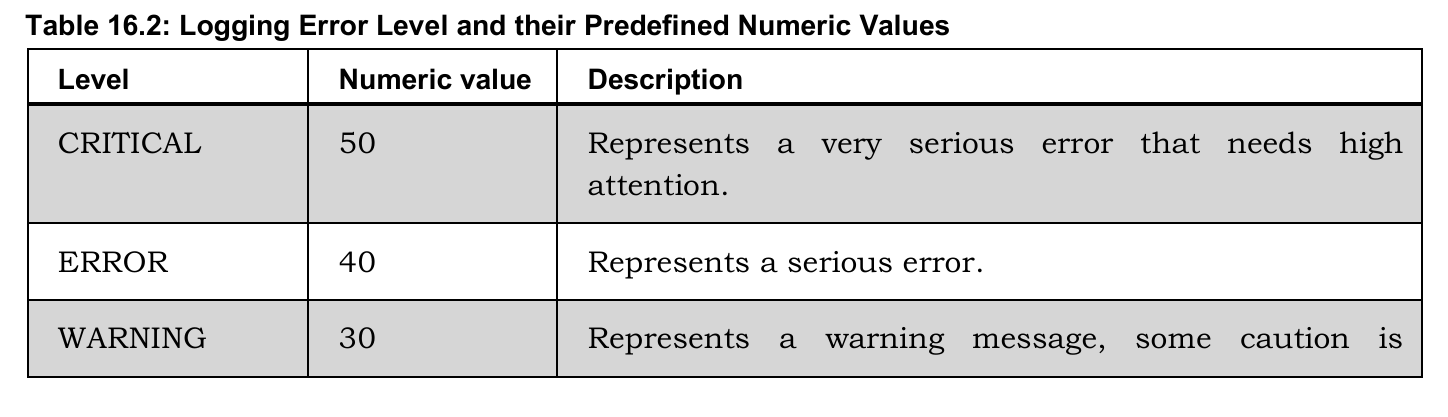
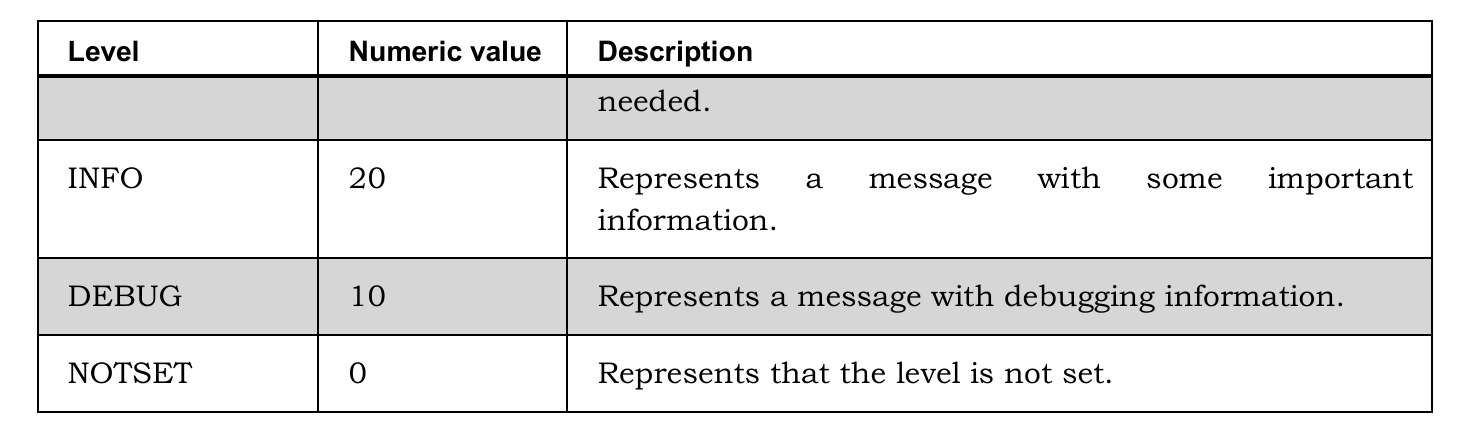

In [48]:
import logging
logging.basicConfig(filename='my_log.txt',level=logging.INFO)
logging.error("this is the error ")
logging.critical("there is a critical error")

In [49]:
logging.warning("The project is going slow.") 
logging.info("You are a junior programmer.") 
logging.debug("Line no. 10 contains syntax error.")

In [50]:
try:
    a=int(input("Enter the 1st value"))
    b=int(input("Enter the 2nd value"))
    c=a/b
except Exception as ex:
    logging.exception(ex)

Enter the 1st value 45
Enter the 2nd value 0


# Effect of errors:

## when there is an error in a program, due to its sudden termination, the following things can be suspected: 
##  The important data in the files or databases used in the program may be lost. 
##  The software may be corrupted. 
##  The program abruptly terminates giving error message to the user making the user losing trust in the software.